<a href="https://colab.research.google.com/github/2101481ando/DeepLearning2022Late/blob/main/DogVsCat2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from keras.applications.vgg16 import VGG16,preprocess_input, decode_predictions
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = VGG16(weights='imagenet')

553476096/553467096 [==============================] - 5s 0us/step


### 画像判定のための関数

In [4]:
def predict(filename, featuresize):
  img = image.load_img(filename, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  # 学習モデルで判定を実行
  preds = model.predict(preprocess_input(x))
  results = decode_predictions(preds, top=featuresize)[0]
  return results
# 関数終わり

### 画像表示のための関数

In [5]:
def showimg(filename, title, i):
  im = Image.open(filename) # 画像ファイルを開く
  im_list = np.array(im) # 画像ビットデータをndarrayにする
  plt.subplot(2, 5, i)
  plt.title(title)
  plt.axis("off")
  plt.imshow(im_list)
# 関数終わり

### Kaggleにある画像データを利用する
https://www.kaggle.com/
<br>犬猫判定用の画像データ<br>
https://www.kaggle.com/c/dogs-vs-cats/data


## 指定されたURLからファイルをダウンロードする

In [7]:
# wgetでwebからファイルをダウンロードする
# GoogleColabでコマンドを実行する時は、先頭に!マークを必ずつけること
# 小さいファイルをGoogleドライブからDLする時は、URLをつけるだけでOK
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt

--2022-10-04 00:44:51--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 142.251.161.139, 142.251.161.101, 142.251.161.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.161.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s49bll016j0mt16758tkah0jnh9khnkp/1664844225000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=2360ec4b-30af-4ed0-b0ca-e6f037f45d8e [following]
--2022-10-04 00:44:51--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s49bll016j0mt16758tkah0jnh9khnkp/1664844225000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=2360ec4b-30af-4ed0-b0ca-e6f037f45d8e
Resolving doc-0k-1s-docs.googleusercontent.com (doc-0k-1s-docs.googleusercontent.com)... 142.250

## Colbに自分のGooglアカウントのドライブをマウントする

In [8]:
# Googleドライブを操作するモジュールをimport
from google.colab import drive
# Googleドライブをマウント
drive.mount('/content/drive')

Mounted at /content/drive


## DLしてきたファイルをマウントしたディレクトリにコピーする

In [9]:
# コピーファイルを置くディレクトリを作る
import os
dir_path = "/content/drive/My Drive/2022LATE"
# すでにディレクトリがあってもエラーにしない
os.makedirs(dir_path, exist_ok=True)
!pwd # 今いるディレクトリを表示
# ファイルをコピー
!cp train.zip "/content/drive/My Drive/2022LATE"
# test.zipはいったん使わないのでコピーしない

/content


# GoogleドライブからColabへファイルをコピー

In [10]:
!cp "/content/drive/My Drive/2022LATE/train.zip" .

## zipファイルを解凍する

In [11]:
# unzipコマンドで解凍
!unzip -o -q "train.zip"
print("zip解凍完了")

zip解凍完了


## 解凍した画像を使って画像判定させる

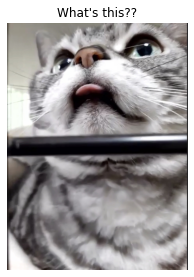

('n02123394', 'Persian_cat', 0.24854623)
('n02124075', 'Egyptian_cat', 0.19980204)
('n02127052', 'lynx', 0.11077842)
('n02120079', 'Arctic_fox', 0.10592964)
('n02110185', 'Siberian_husky', 0.071796395)
('n02109961', 'Eskimo_dog', 0.068769194)
('n02110063', 'malamute', 0.04655882)
('n02123045', 'tabby', 0.03611279)
('n02123159', 'tiger_cat', 0.020141108)
('n02114367', 'timber_wolf', 0.00770315)


In [17]:
# 画像を指定する変数
filename = "S__327294980.jpg"
plt.figure(figsize=(20, 10))
for i in range(1):
  showimg(filename, "What's this??", i+1)
# ループ終わり
plt.show()

# 表示した画像を判定
results = predict(filename, 10)
for result in results:
  print(result)